In [42]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
import numpy as np

def plot_pairwise_density(
    y_pred,
    y_true,
    ax,
    title="",
    cmap="Blues",
    alpha=1.0,
    cbar=False,
    draw_active_lines=True,
    label_fpr=False,
    label_tpr=False,
    threshold=6.0,
    show_scatter=False,
    scatter_color="#DA5168",
    show_pearson=False,
    #figsize=(5, 5),

):
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    pearson = pearsonr(y_pred, y_true)[0]
    spearman = spearmanr(y_pred, y_true)[0]
    kendall = kendalltau(y_pred, y_true)[0]

    #fig = plt.figure(figsize=figsize)
    sns.kdeplot(x=y_true, y=y_pred, cmap=cmap, fill=True, alpha=alpha, cbar=cbar, ax=ax)
    ax.plot([3, 11], [3, 11], color="black", linestyle="--", linewidth=0.5)
    ax.plot([], [], label=f"RMSE = {round(rmse,3)}", color="darkblue")
    if show_pearson:
        ax.plot([], [], label=f"Pearson = {round(pearson,3)}", color="darkblue")
    ax.plot([], [], label=f"Spearman = {round(spearman,3)}", color="darkblue")
    # plt.plot([], [], label=f"Kendall = {round(kendall,2)}", color="darkblue")
    ax.legend(
        loc="upper center",
        ncol=4,
        title_fontsize=8,
        fontsize=11,
        handlelength=-0.0,
        shadow=False,
        fancybox=True,
        framealpha=1.0,
    )
    if label_fpr:
        neg_ix = np.argwhere(y_true < threshold)
        y_pred_neg = y_pred[neg_ix]
        fpr = len(y_pred_neg[y_pred_neg >= threshold]) / len(y_pred_neg)
        ax.text(
            3.5,
            8.5,
            f"FPR = {round(fpr,2)}",
            horizontalalignment="left",
            size="medium",
            color="indianred",
            weight="semibold",
        )
    if label_tpr:
        pos_ix = np.argwhere(y_true >= threshold)
        y_pred_pos = y_pred[pos_ix]
        tpr = len(y_pred_pos[y_pred_pos >= threshold]) / len(y_pred_pos)
        ax.text(
            6.5,
            8.5,
            f"TPR = {round(tpr,2)}",
            horizontalalignment="left",
            size="medium",
            color="indianred",
            weight="semibold",
        )

    if show_scatter:
        ax.scatter(y_true, y_pred, s=5, color="#E96274")

    if draw_active_lines:
        ax.hlines(threshold, 3, 11, linestyle="--", color="indianred")
        ax.vlines(threshold, 3, 11, linestyle="--", color="indianred")
    ax.set_ylabel(r"Predicted pIC$_{50}$", fontsize=20)
    ax.set_xlabel(r"Measured pIC$_{50}$", fontsize=20)
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)
    ax.set_xlim(3.5, 10)
    ax.set_ylim(3.5, 10)
    #plt.title(f"{title}", fontsize=14)

/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_9884/3729300399.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


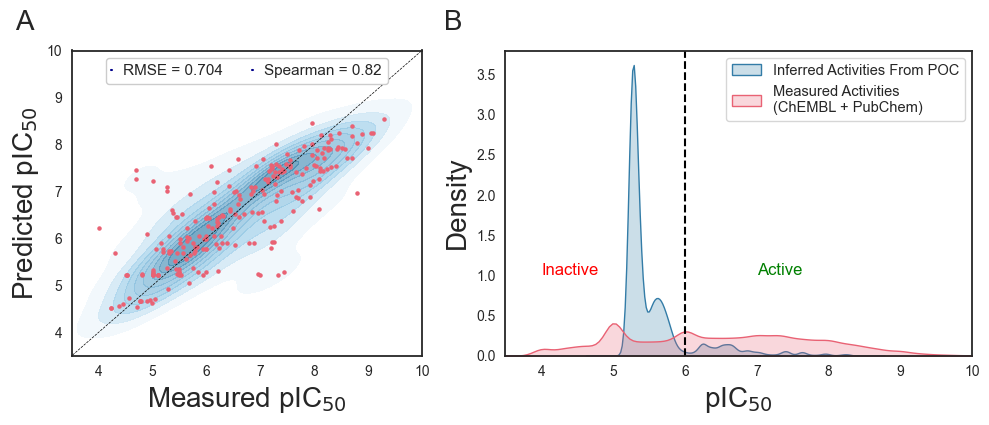

In [43]:
import pandas as pd 
from matplotlib import rc 
import matplotlib.colors 
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.3

colors = ["#FFFFFF","#9BCDE9", "#7DB6D6", "#337CA7"] #["#B3E1F8", "#A9D9F2", "#9BCDE9", "#8CC2E0", "#7DB6D6", "#6EAACD", "#609FC3", "#5193BA", "#4288B0","#337CA7"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.set_style("white")

#rc('font',**{'family':'serif'})
data = pd.read_csv("test_predictions_sd_rfr.csv")

fig, axs = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'width_ratios': [1.5, 2]})
y_pred = data["y_pred"].to_numpy()
y_true = data["y_true"].to_numpy()
#cmap = sns.light_palette("royalblue", as_cmap=True)
ax = axs[0]
ax = plot_pairwise_density(y_pred, y_true, ax, show_scatter=True, cmap=cmap, alpha=0.7, draw_active_lines=False)#, title="POC to pIC50 Random Forest Model\nTest Set Predictions")

data = pd.read_csv("../../data/prepped_activities_all_chembl_pubchem.csv")
measured = data[data["activity_type"] == "measured"]["activity_value"].tolist()
inferred = data[data["activity_type"] == "inferred"]["activity_value"].tolist()

sns.set_style("white")

ax = axs[1]
sns.kdeplot(inferred, fill=True, color="#337CA7", ax=ax, label="Inferred Activities From POC")
sns.kdeplot(measured, fill=True, color="#E96274", ax=ax, label="Measured Activities\n(ChEMBL + PubChem)")
ax.vlines(6.0, 0., 10.0, color="black", linestyles="--")
ax.legend(fontsize=10.5, loc="upper right")
ax.set_ylim(0, 3.8)
ax.set_xlim(3.5, 10)
ax.text(4, 1, "Inactive", fontdict={"color": "red", "fontsize": 12})
ax.text(7, 1, "Active", fontdict={"color": "green", "fontsize": 12})
# plt.title("Distribution of Inferred and Predicted Activites", fontsize=14)
ax.set_xlabel(r"pIC$_{50}$", fontsize=20)
ax.set_ylabel("Density", fontsize=20)
fig.text(0.02, 1.0, "A", fontsize=20)
fig.text((1.5)/3.5 + 0.02, 1.0, "B", fontsize=20)
fig.tight_layout()
fig.savefig("fig2.pdf", dpi=1000,bbox_inches="tight")
fig.show()


In [8]:

# .tight_layout()
# plt.savefig("measured_vs_inferred_activity.svg", format="svg")
plt.show()